## The Database of Stonktastic
***

### Database Structure
Stonktastic uses a relational database created with SQLite3. The database consists of 5 different tables in a star schema. 

### Why SQL Lite
The project was built using SQL Lite as we wanted some of the following features:
- **Lightweight** : SQL lite databases require very little overhead and maintaince. It also connects into python easily with several common and easy to use libraries
- **No installation** : We wanted a database that didn't require large amounts of set up and maintaince. 
- **Cheaper to run** : When running on a cloud server, the SQL lite database does not need to run. This is preferable for a low-traffic load website.

### Schema:

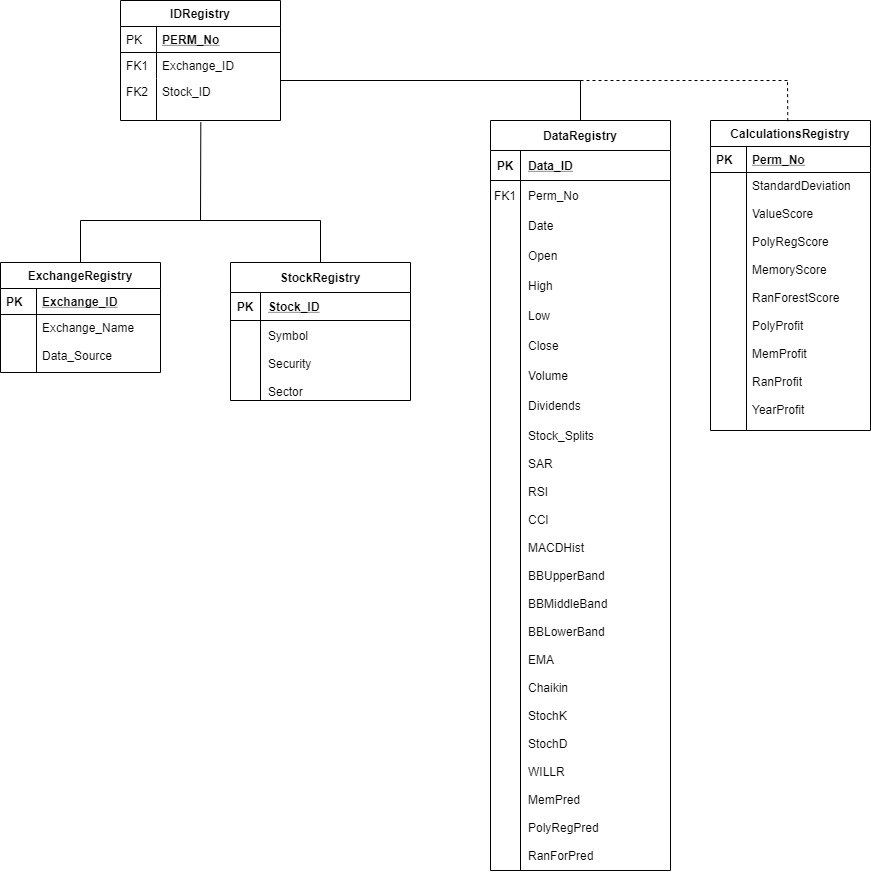

In [3]:
from IPython.display import Image
Image(filename="StockDatabase.jpg")

#### Tables:
- DataRegistry
- CalculationsRegistry
- ExchangeRegistry
- IDRegistry
- StockRegistry

### DataRegistry
**Description** : The DataRegistry is a fact table that contains our day to day information such as open and close values. When running the database any numerical data pertaining to the value of a stock is stored here. Along with this data the code that creates and runs the database also calculates different financial indicators such as CCI or EMA before storing them in the DataRegistry as well.
The DataRegistry uses a unique index on perm_no and date for ease of use when looking up information. This serves with any new data being inserted at the bottom of the table and not automatically grouped by the stock.

#### Fields
- *Perm Node* : The perm node number used with the perm node table to connect each stocks information together.
- *Date* : Date for the row
- *Open* : Opening price for the stock that day
- *High* : Stocks highest value during that day of trading
- *Low* : Stocks lowest value during that day of trading
- *Close* : The closing price for the stock during that day of trading
- *Volume* : Amount of stocks traded during that day of trading
- *Dividends* : Dividends payed our during the day of trading
- *Stock Splits* : If the stock split or merged during trading hours, the value of the plit is listed here
- *SAR* : Daily Parabolic SAR value for the stock for the given date
- *RSI* : Daily Relative Strength Index value for the stock for the given date
- *CCI* : Daily Commodity Channel Index value for the stock for the given date
- *MACDHist* : Daily Moving Average Convergence Divergence value for the stock for the given date
- *BBUpperBand* : Daily Upper Bollinger Band's value for the stock for the given date
- *BBMiddleBand* : Daily Middle Bollinger Band's value for the stock for the given date
- *BBLowerBand* : Daily Lower Bollinger Band's value for the stock for the given date
- *EMA* : Daily Exponential Moving Average value for the stock for the given date
- *Chaikin* : Daily Chaikin Oscillator value for the stock for the given date
- *StockK* : Daily Stochastics K value for the stock for the given date
- *StockD* : Daily Stochastics D value for the stock for the given date
- *WILLR* : Daily Williams Percent Range value for the stock for the given date
- *MemPred* : Individual stocks LTSM Model's prediction for the closing value of the given day
- *LinRegPred* : Individual stocks Linear Regression Model's prediction for the closing value of the given day
- *RanForestPred* :Individual stocks Random Forest Model's prediction for the closing value of the given day

### CalculationsRegistry
**Description** : The CalculationsRegistry is a fact table that contains any information that is calculated using data from our DataRegistry. This data is not stored on a day by day basis but instead each row of data is for each stock that Stonktastic goes over. This table while does not directly reference our lookup table it uses the same primary key perm_no to connect our tables.
Data found in this table would include such calculations as our standard deviation, our machine learning scores, and profits for each stock.

#### Fields
- *Perm Node Number* : The perm node number used with the perm node table to connect each stocks information together.
- *Standard Deviation* : The calculated standard deviation for the stock
- *Value Score* : Rank calculated after all other calculations are done on which stock's estimations would generate the most profit. Not directly tied to accuracy of models
- *LinRegScore* : The accuracy of the Linear Regression Model for this stock
- *MemoryScore* : The accuracy of the Recurrent Neural Network - Long Term Short Term Memory Model for this stock
- *RanForestScore* : The accuracy of the Random Forest Model for this stock.
- *LinProfit* : Potential profit from buying and selling this stock using the Linear Regression Model estimates from the last year
- *MemProfit* : Potential profit from buying and selling this stock using the LTSM Model estimates from the last year
- *RanProfit* : Potential profit from buying and selling this stock using the Random Forest Model estimates from the last year
- *YearlyProfit* : The average value of LinProfit, MemProfit and RanProfit

### ExchangeRegistry
**Description** : The ExchangeRegistry is where any information over our exchange such as S&P500 or The Dow would be stored. This table also serves to keep track of where we sourced any data from such as yahoo.

#### Fields
- *Exchange ID* : Used with ID Registry to indicate each stock with the Stock Exchange they are tied with
- *Exchange Name* : The name of the Stock Exchange
- *Data Source* : Where we got the data from

### IDRegistry
**Description** : The IDRegistry is our lookup table for the entire star database. It contains our foreign keys to the exchange and stock registries as well as our Perm_No. The Perm_no is the primary key and the lookup value that is assigned as each stock is added in an incremental order. The perm_no is also what connects our facts tables that hold our information for each stock.

#### Fields
- *Perm Node* : The perm node value used to connect the individual stock's information to the data registry table
- *Exchange ID* : Connects each stock with the ID of the exchange they are listed on
- *Stock ID* : The ID used connect stocks meta data with the rest of the stocks information

### StockRegistry
**Description** : The StockRegistry is where we keep any descriptive information over each stock. In this table we store the Symbol, Security name, and the Sector that the stock belongs to.

#### Fields
- *Stock ID* : The ID of the stock to connect it to the ID Registry table
- *Symbol* : The ticker of the stock shown on the exchange
- *Security* : The full name of the company
- *Sector* : Which sector is the company registered in

### Staging Table
Should be empty, used during calculations before loading them into the Data Registry. Staging tables are used for any data cleaning and organization that needs to be done before we insert our data into the fact tables.

#### Fields
- *Same as Data Registry* : Should be empty after running the full code

#### Database Implementation
While the purpose of Stonktastic is an experiment using the stocks in S&P500, the database is designed for future proofing if other stocks from other exchanges were to be brought in. The goal for the database was to be able to expand the database with little change as the project itself expands. Our facts tables are created in a way that any new data would be inserted at the bottom in a stack and any lookup for the table would be based on the unique index that was created based on date and perm_no.